<a href="https://colab.research.google.com/github/karthikchary/Visualization/blob/master/Matpltlib_visalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.10.1


In [ ]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,96.712059,2.575276,0.148283,0.376759,0.187623,43298,75.107395,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,66.384340,32.900433,0.178807,0.451722,0.084698,6724,59.726353,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,96.571276,2.861717,0.233473,0.106731,0.226803,9669,69.334988,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,95.254171,0.412257,0.149322,0.486918,3.697332,19272,75.472188,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,90.198766,9.372858,0.239890,0.085675,0.102810,3979,68.861523,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


In [ ]:
midwest.describe()

,PID,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,percwhite,percblack,percamerindan,percasian,percother,popadults,perchsd,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,dot_size
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1398.057229,0.032931,30204.463855,1041.746087,29346.024096,441.352410,164.849398,119.114458,133.123494,97.108083,1.284863,0.952409,0.310949,0.343696,19196.942771,72.727403,16.471980,3.842269,29244.445783,97.166232,12.965367,16.866808,11.270336,12.216239,0.159639,221.769561
std,885.437076,0.015243,18003.196483,767.414024,17312.165087,909.075872,375.136440,205.925599,273.533574,6.000439,3.104963,5.194542,0.334535,0.591924,11166.318094,5.615202,4.633727,1.647157,17283.661343,2.850549,5.357400,7.434103,5.326181,3.660343,0.366823,97.677486
min,561.000000,0.005000,1701.000000,85.050000,416.000000,0.000000,4.000000,0.000000,0.000000,10.694087,0.000000,0.056232,0.000000,0.000000,1287.000000,46.912261,7.336108,0.520291,1696.000000,80.902441,2.180168,1.918955,1.938504,3.547067,0.000000,100.000000
25%,662.750000,0.023000,16110.500000,542.068910,15835.000000,17.750000,34.000000,26.000000,14.000000,97.028614,0.089394,0.150714,0.156392,0.078227,10732.750000,69.609737,13.569232,2.870991,15885.250000,97.084458,9.476234,11.825003,7.858141,9.526419,0.000000,158.169980
50%,1207.000000,0.029000,26536.000000,874.543104,26147.000000,66.000000,65.000000,60.000000,37.000000,98.613934,0.264167,0.207638,0.241547,0.146556,17141.000000,73.447856,15.585490,3.400538,26055.000000,98.246811,12.073297,15.415727,10.137942,11.858056,0.000000,200.487741
75%,2050.500000,0.037250,39365.750000,1374.670110,38234.500000,420.000000,137.000000,136.000000,104.250000,99.236479,1.218316,0.408548,0.357116,0.317722,25139.250000,76.392399,18.402578,4.318381,38287.000000,98.606257,15.535773,20.774721,13.437998,14.191399,0.000000,264.144577
max,3052.000000,0.110000,77932.000000,7156.000000,74700.000000,6342.000000,3820.000000,2178.000000,2362.000000,99.822821,32.900433,89.177378,3.566574,4.304956,50112.000000,86.899146,37.419780,14.089892,75406.000000,99.860384,48.691099,64.308477,43.312464,31.161972,1.000000,1000.000000


In [ ]:
categories = np.unique(midwest['category'])

In [ ]:
categories

array(['AAR', 'AAU', 'AHR', 'ALR', 'ALU', 'HAR', 'HAU', 'HHR', 'HLR',
       'HLU', 'LAR', 'LAU', 'LHR', 'LHU'], dtype=object)

In [ ]:
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

In [ ]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

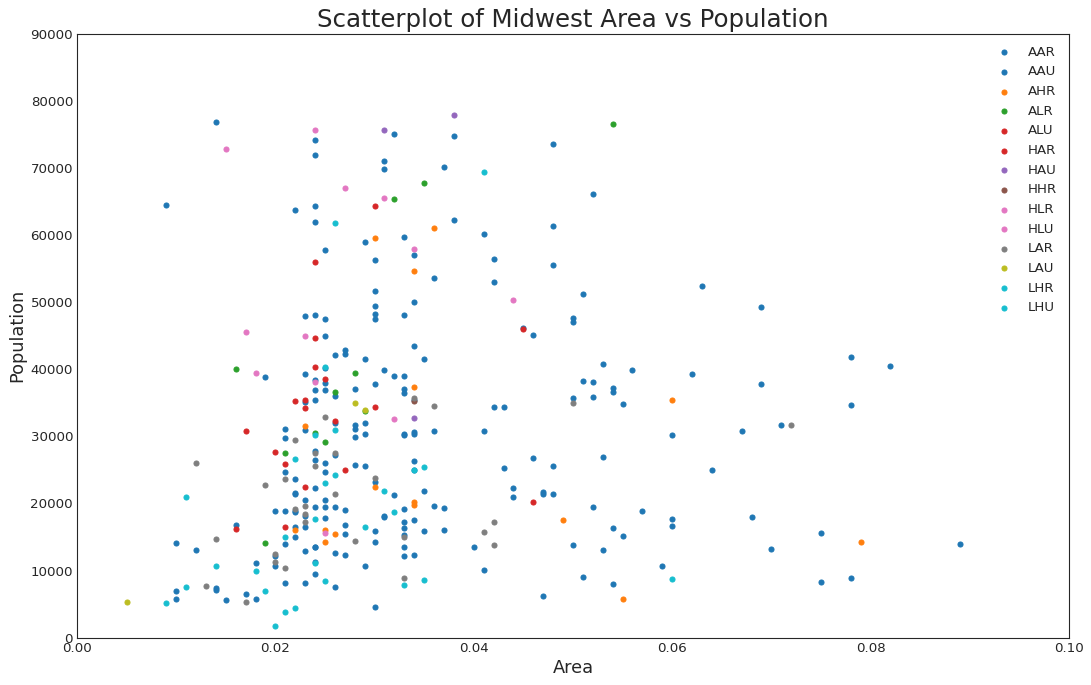

In [ ]:
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',data=midwest.loc[midwest.category==category, :],s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()   

In [ ]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

In [ ]:
# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

In [ ]:
# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

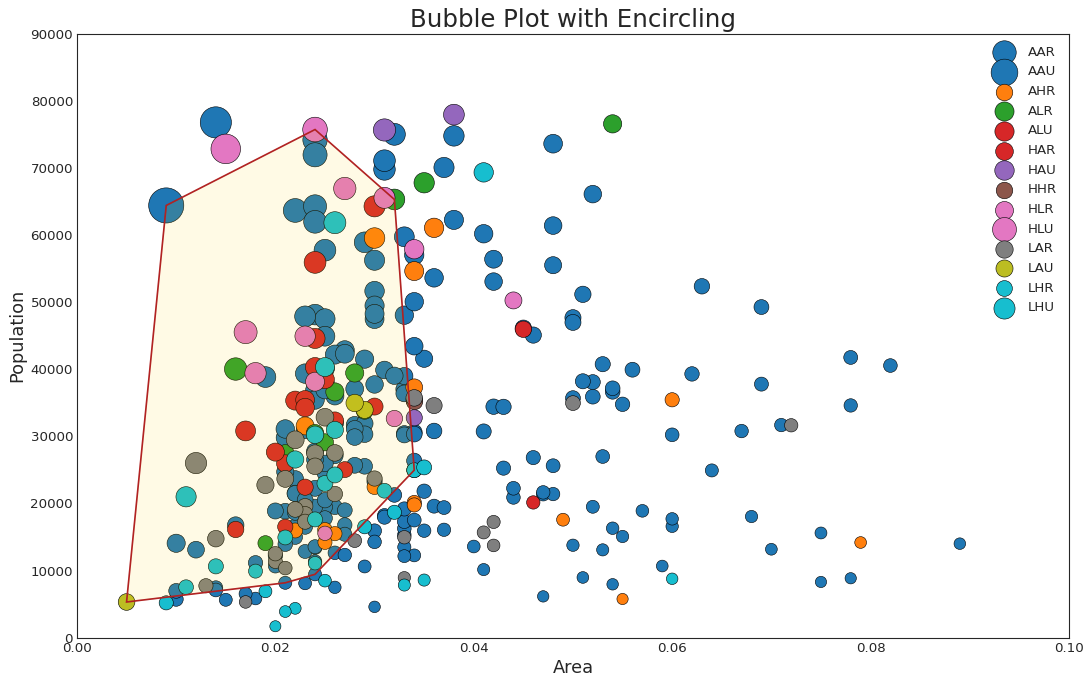

In [ ]:
# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)


# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

Scatter plot with linear regression line of best fit

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [ ]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
df_select = df.loc[df.cyl.isin([4,8]),:]

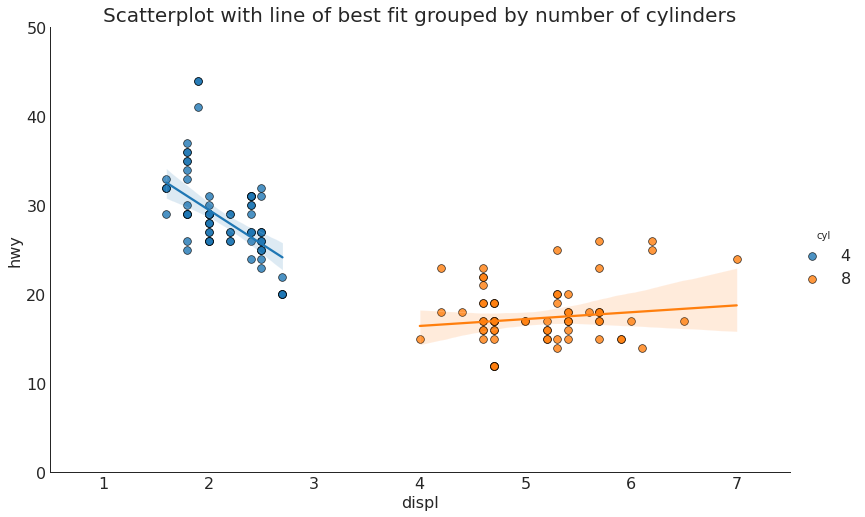

In [ ]:
# Plot
sns.set_style("white")

gridobj = sns.lmplot(x='displ',y='hwy',hue='cyl',data=df_select,height=7,aspect=1.6,robust=True,palette='tab10',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 7.5),ylim=(0,50))

plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)

plt.show()

Each regression line in its own column

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

In [ ]:
df_select

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
224,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize


No handles with labels found to put in legend.


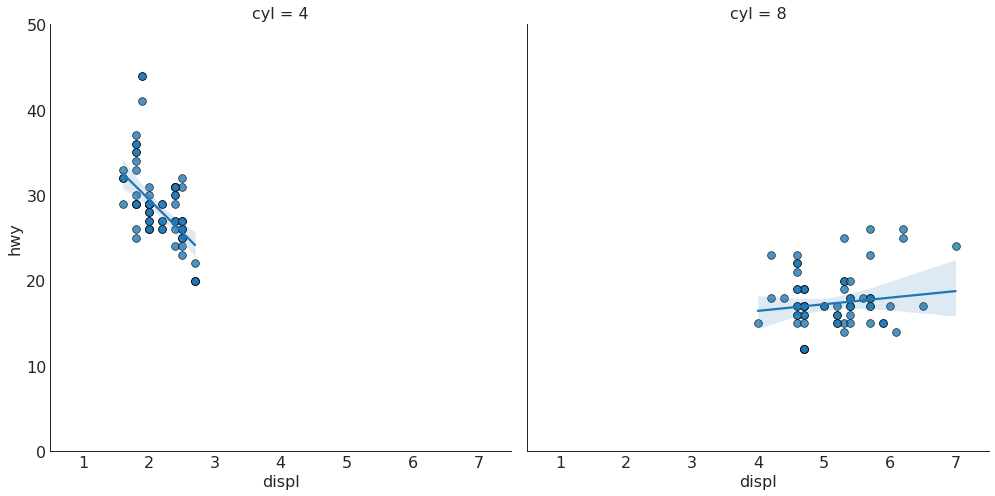

In [ ]:
sns.set_style('white')

gridobj = sns.lmplot(x='displ',y='hwy',data=df_select,palette='Set1',height=7,robust=True,col='cyl',scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.legend()
plt.show()

Marginal Boxplot

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

In [ ]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
fig = plt.figure(figsize=(16,10),dpi= 80)

grid = plt.GridSpec(4,4,hspace=0.5, wspace=0.2)

<Figure size 1280x800 with 0 Axes>

In [ ]:
# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

In [ ]:
# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)


# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

In [ ]:
# Import Dataset
df1 = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [ ]:
df1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mpg      32 non-null     float64
 1   cyl      32 non-null     int64  
 2   disp     32 non-null     float64
 3   hp       32 non-null     int64  
 4   drat     32 non-null     float64
 5   wt       32 non-null     float64
 6   qsec     32 non-null     float64
 7   vs       32 non-null     int64  
 8   am       32 non-null     int64  
 9   gear     32 non-null     int64  
 10  carb     32 non-null     int64  
 11  fast     32 non-null     int64  
 12  cars     32 non-null     object 
 13  carname  32 non-null     object 
dtypes: float64(5), int64(7), object(2)
memory usage: 3.6+ KB


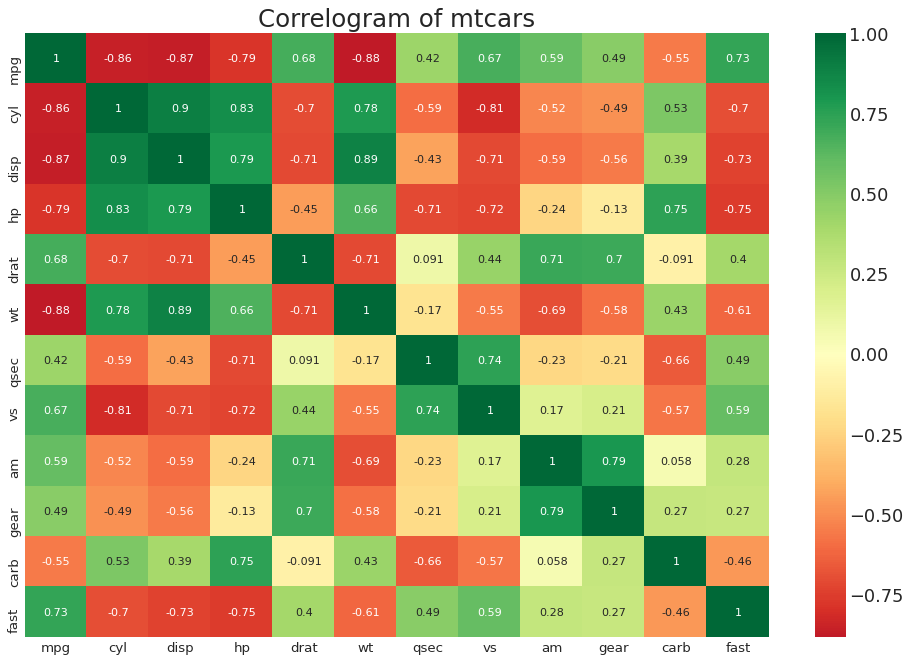

In [ ]:
plt.figure(figsize=(15,10),dpi=80)

sns.heatmap(df1.corr(),xticklabels=df1.corr().columns,yticklabels=df1.corr().columns,cmap='RdYlGn',center=0,annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Diverging Bars

In [ ]:
df2 = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

In [ ]:
df2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout


In [ ]:
x = df2.loc[:,['mpg']]

In [ ]:
x.head()

,mpg
0,4.582576
1,4.582576
2,4.774935
3,4.626013
4,4.324350


In [ ]:
x.describe()

,mpg
count,32.000000
mean,4.434770
std,0.661137
min,3.224903
25%,3.927432
50%,4.381780
75%,4.774935
max,5.822371


In [ ]:
df2['mpg_z'] = (x - x.mean())/x.std()

In [ ]:
df2['mpg_z'].head()

0    0.223563
1    0.223563
2    0.514515
3    0.289265
4   -0.167015
Name: mpg_z, dtype: float64

In [ ]:
df2['colors'] = ['red' if x < 0 else 'green' for x in df2['mpg_z']]
df2['colors'].head()

0    green
1    green
2    green
3    green
4      red
Name: colors, dtype: object

In [ ]:
df2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4,0.223563,green
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag,0.223563,green
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710,0.514515,green
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive,0.289265,green
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout,-0.167015,red


In [ ]:
df2.tail()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname,mpg_z,colors
27,25,5.224940,4,79.0,66,4.08,1.935,18.90,1,1,4,1,1,Fiat X1-9,Fiat X1-9,1.195169,green
28,27,5.513620,4,95.1,113,3.77,1.513,16.90,1,1,5,2,1,Lotus Europa,Lotus Europa,1.631810,green
29,18,5.513620,4,75.7,52,4.93,1.615,18.52,1,1,4,2,1,Honda Civic,Honda Civic,1.631810,green
30,17,5.692100,4,78.7,66,4.08,2.200,19.47,1,1,4,1,1,Fiat 128,Fiat 128,1.901770,green
31,19,5.822371,4,71.1,65,4.22,1.835,19.90,1,1,4,1,1,Toyota Corolla,Toyota Corolla,2.098811,green


In [ ]:
df2.sort_values('mpg_z', inplace=True)

In [ ]:
df2.reset_index(inplace=True)

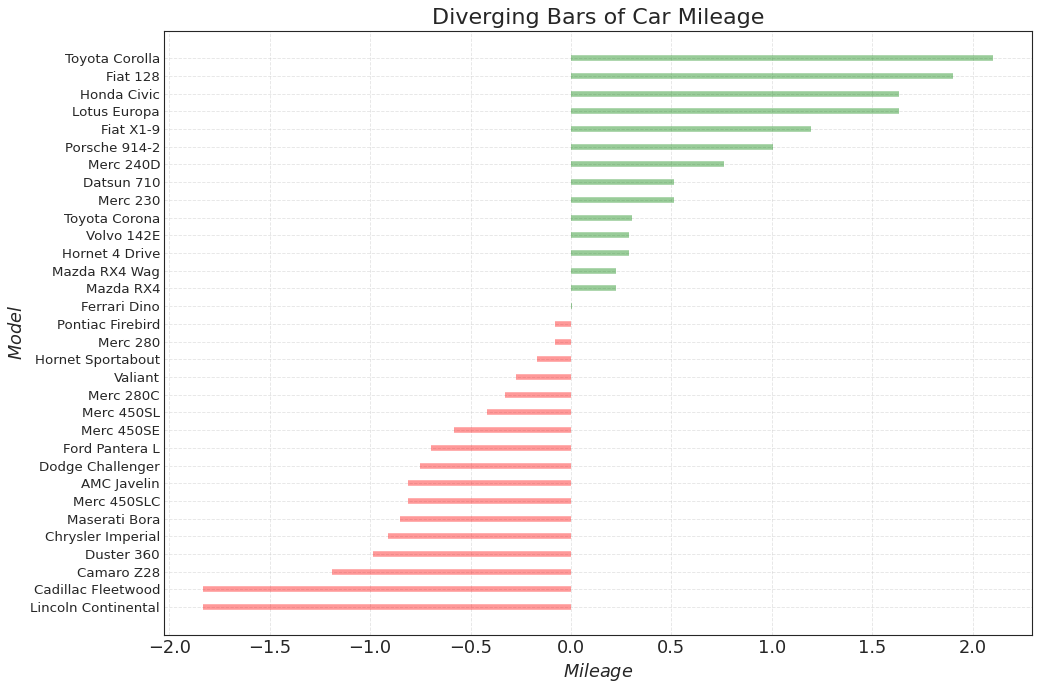

In [ ]:

# Draw plot
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df2.index, xmin=0, xmax=df2.mpg_z, color=df2.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df2.index, df2.cars, fontsize=12)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

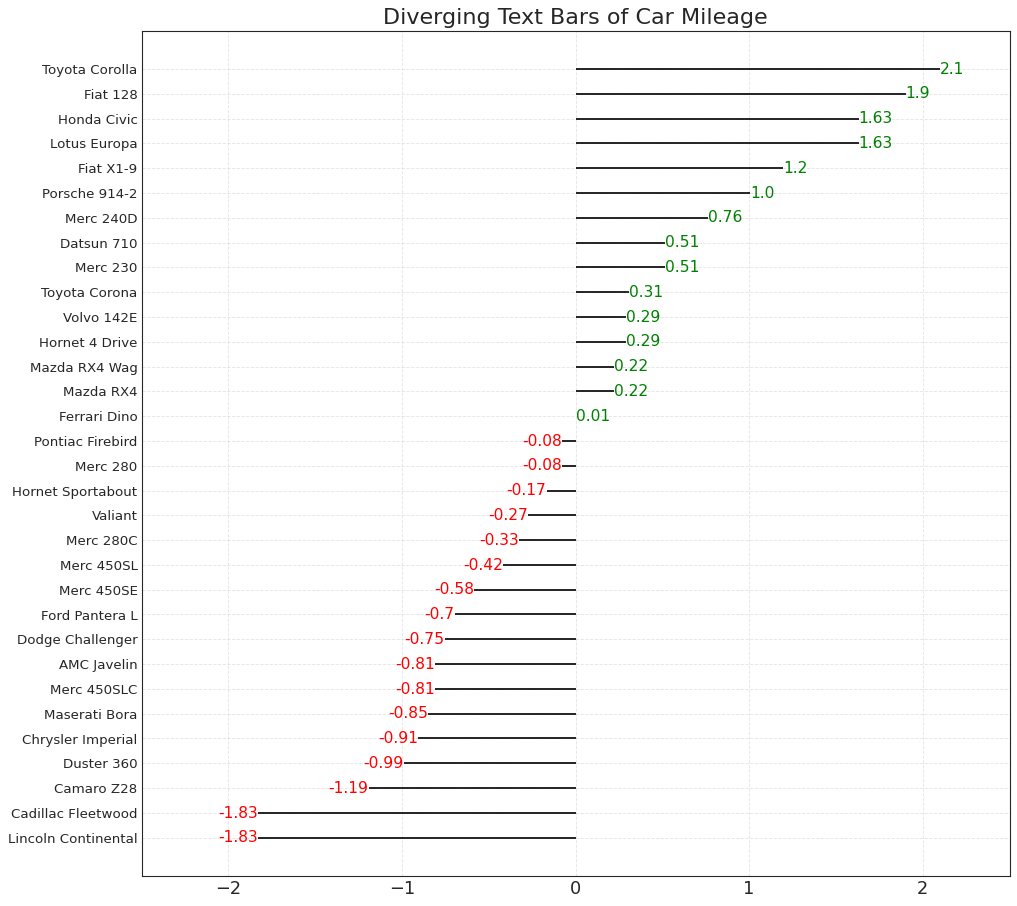

In [ ]:
# Draw plot
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=df2.index, xmin=0, xmax=df2.mpg_z)
for x, y, tex in zip(df2.mpg_z, df2.index, df2.mpg_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(df2.index, df2.cars, fontsize=12)
plt.title('Diverging Text Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()